In [1]:
#import torch
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
#from sklearn.metrics.pairwise import cosine_similarity
from scipy import stats

In [2]:
mlo_raw = pd.read_excel('../data/phasepdbv2_1_mlolt_mloht.xlsx')
mlo = mlo_raw[(mlo_raw['organism']=='Homo sapiens')&(mlo_raw['entry']!='_')].reset_index(drop=True)
mlo['entry'] = mlo['entry'].apply(lambda x: x.split('-')[0])
mloset = mlo.groupby('MLO')['entry'].apply(lambda x: ' '.join(set(x))).to_frame().reset_index()

mloset['size'] = mloset['entry'].apply(lambda x: len(set(x.split(' '))))
mloset.sort_values(by='size', ascending=False).reset_index(drop=True)

,MLO,entry,size
0,Nucleolus,Q9BQA5 Q9BSE2 P22087 Q9NQT5 Q9NYL2 Q8N9E5 Q927...,2015
1,Stress granule,P22087 P24539 Q92609 O95249 O14638 Q99959 O147...,1536
2,Nuclear stress body,P06748 O95373 P60709 B4DP75 E5RIP5 P27361 F8VR...,459
3,P-body,P06748 P22087 P27361 O95140 Q9H9A5 Q9C098 P479...,397
4,Nuclear speckle,O15047 O14874 Q86YP4 Q9P0U4 Q13608 Q32MK0 Q9BZ...,299
5,Paraspeckle,Q13765 P60709 Q14247 O75494 Q96C19 P68371 Q141...,252
6,Splicesome,Q8N302 Q92879 P11940 Q96FV9 Q96NC0 O75494 Q6P2...,246
7,Nuclear body,P22087 P11518 P12947 P46783 Q9BYN8 P02545 P148...,174
8,PML nuclear body,P54132 Q99607 Q674X7 Q6SA08 Q7Z2Y5 P48736 P235...,165
9,Cajal body,O75838 P06748 Q96IF1 O75051 Q12873 Q14671 Q96H...,120


In [24]:
mlo_names  = mloset[mloset['size']>=10]['MLO'].tolist()

In [ ]:
#weighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_with_feature_enrichment.pkl')
#unweighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/Unweighted_PS_clusters_with_MLO_enrichment.pkl')

In [ ]:
weighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/PS_clusters_allfeature_enrichment.pkl')
unweighted_enrich_df = pd.read_pickle(f'/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/Unweighted_PS_clusters_with_MLO_enrichment.pkl')

In [7]:
len(weighted_enrich_df)

493

In [8]:
len(unweighted_enrich_df)

283

In [ ]:
SAVE_ROOT = '/home/lyz/PhaSepGAT/saves/INTEGRATE_ProSE80d_pos1neg1/'
preds = pd.read_pickle(f'{SAVE_ROOT}preds.pkl')
genes = pd.read_pickle(f'{SAVE_ROOT}genes.pkl')

In [31]:
genename_to_uniprot = pd.read_pickle("../data/HUMAN_9606_idmapping_genename.pkl")
genename_to_uniprot_integrate = genename_to_uniprot.set_index(['Uniprot']).loc[list(set(genes)&set(genename_to_uniprot['Uniprot'].tolist())),:].reset_index()

genename_to_uniprot_dict = genename_to_uniprot_integrate.set_index(['ID']).to_dict()['Uniprot']
uniprot_to_genename_dict = genename_to_uniprot_integrate.set_index(['Uniprot']).to_dict()['ID']

## weighted & unweighted, PS clusters fraction

In [9]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt  
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500
mpl.rcParams['font.family']= 'Arial'

In [6]:
ncluster_weighted = 2093
ncluster_unweighted = 3482

In [19]:
283/3482

0.08127512923607122

In [20]:
493/2093

0.23554706163401815

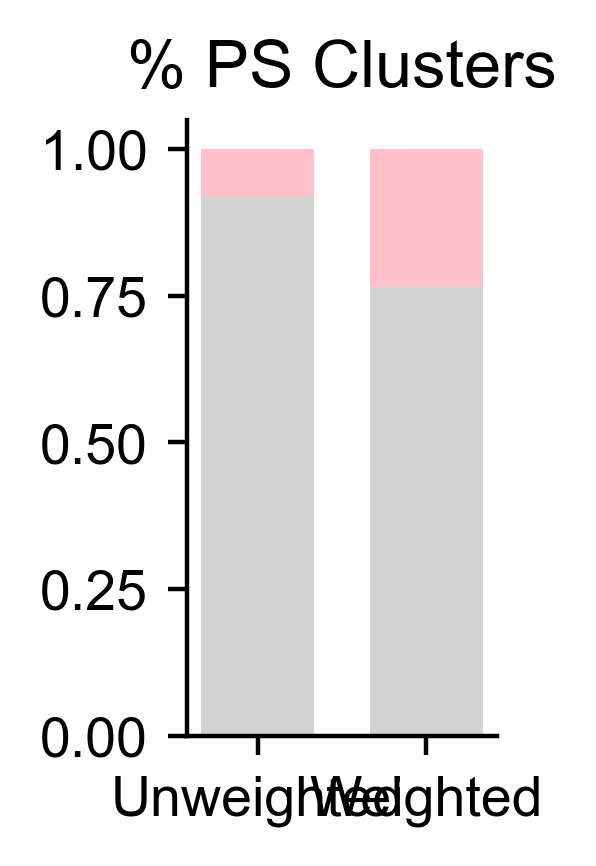

In [ ]:
x = ['Unweighted','Weighted']
y1 = [1-283/3482,1-493/2093]
y2 = [283/3482,493/2093]

plt.figure(figsize=(1, 2),dpi = 400)

plt.bar(x, y1, width=0.67,color='lightgrey')
plt.bar(x, y2, bottom=y1, width=0.67,color='pink')


plt.title("% PS Clusters")

sns.despine()


## MLO enrichment comparision

In [174]:
plot_columns = [f"FDR {i}" for i in mlo_names]

In [175]:
weighted_plot_mlo_df = weighted_enrich_df.set_index(['Label']).loc[:,plot_columns]
unweighted_plot_mlo_df = unweighted_enrich_df.set_index(['Label']).loc[:,plot_columns]

In [176]:
weighted_enrich_c = []
for c in weighted_plot_mlo_df.index:
    if np.min(weighted_plot_mlo_df.loc[c,:].tolist()) < 0.05:
        weighted_enrich_c.append(c)

In [177]:
len(weighted_enrich_c)

112

In [178]:
weighted_plot_mlo_df = weighted_plot_mlo_df.loc[weighted_enrich_c,:]
weighted_plot_mlo_df = weighted_plot_mlo_df.drop(weighted_plot_mlo_df.columns[weighted_plot_mlo_df.apply(lambda x: all(x >0.05))],axis=1)

In [179]:
unweighted_enrich_c = []
for c in unweighted_plot_mlo_df.index:
    if np.min(unweighted_plot_mlo_df.loc[c,:].tolist()) < 0.05:
        unweighted_enrich_c.append(c)

In [180]:
len(unweighted_enrich_c)

32

In [181]:
unweighted_plot_mlo_df = unweighted_plot_mlo_df.loc[unweighted_enrich_c,:]
unweighted_plot_mlo_df = unweighted_plot_mlo_df.drop(unweighted_plot_mlo_df.columns[unweighted_plot_mlo_df.apply(lambda x: all(x >0.05))],axis=1)

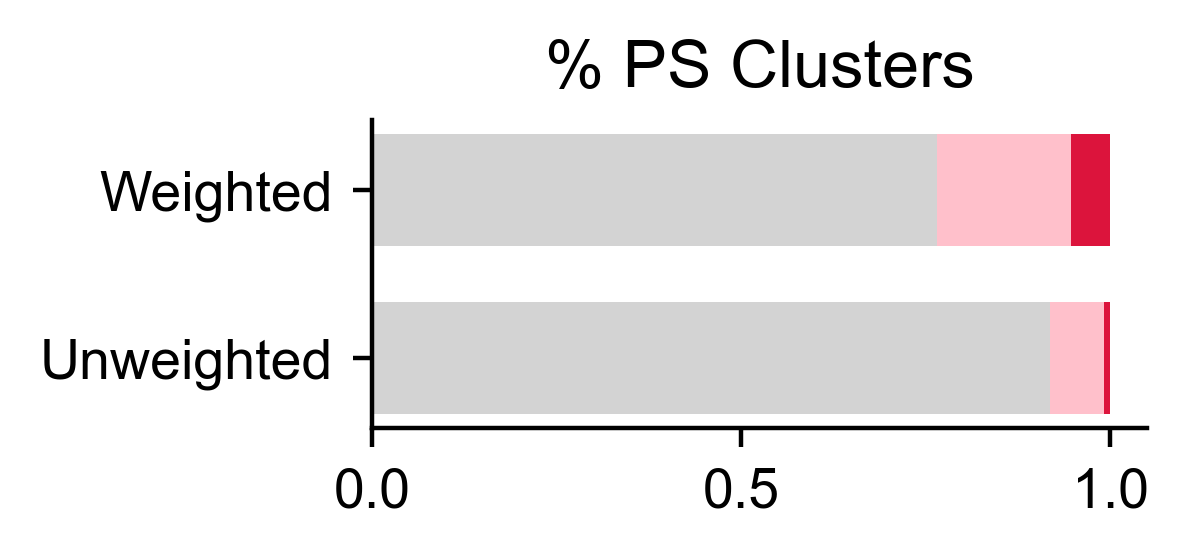

In [ ]:
x = ['Unweighted','Weighted']
y1 = [1-283/3482,1-493/2093]
y2 = [283/3482-32/3482,493/2093-112/2093]
y3 = [32/3482,112/2093]

plt.figure(figsize=(2.5, 1),dpi = 400)

plt.barh(x, y1, height=0.67,color='lightgrey')
plt.barh(x, y2, left=y1, height=0.67,color='pink')
plt.barh(x, y3, left=np.array(y1)+np.array(y2), height=0.67,color='crimson')


plt.title("% PS Clusters")

sns.despine()


In [182]:
weighted_plot_mlo_df.columns = [i.replace('FDR ','') for i in weighted_plot_mlo_df.columns]
weighted_plot_mlo_df = -np.log10(weighted_plot_mlo_df)

In [183]:
unweighted_plot_mlo_df.columns = [i.replace('FDR ','') for i in unweighted_plot_mlo_df.columns]
unweighted_plot_mlo_df = -np.log10(unweighted_plot_mlo_df)

In [149]:
mlo_enrich_count1 = {}
for mlo in weighted_plot_mlo_df.columns:
    mlo_enrich_count1[mlo] = len(weighted_plot_mlo_df[weighted_plot_mlo_df[mlo]>-np.log10(0.05)])
mlo_enrich_count1 = pd.DataFrame([mlo_enrich_count1]).T.reset_index()
mlo_enrich_count1.columns = ['MLO','Num']

In [150]:
mlo_enrich_count1

,MLO,Num
0,Cajal body,10
1,IMP1 ribonucleoprotein granule,3
2,Nuclear body,16
3,Nuclear pore complex,1
4,Nuclear speckle,29
5,Nuclear stress body,11
6,Nucleolus,19
7,P-body,15
8,Paraspeckle,37
9,SMN complex,18


In [151]:
mlo_enrich_count2 = {}
for mlo in unweighted_plot_mlo_df.columns:
    mlo_enrich_count2[mlo] = len(unweighted_plot_mlo_df[unweighted_plot_mlo_df[mlo]>-np.log10(0.05)])
mlo_enrich_count2 = pd.DataFrame([mlo_enrich_count2]).T.reset_index()
mlo_enrich_count2.columns = ['MLO','Num']

In [152]:
mlo_enrich_count2

,MLO,Num
0,Cajal body,4
1,IMP1 ribonucleoprotein granule,1
2,Nuclear body,6
3,Nuclear pore complex,1
4,Nuclear speckle,12
5,Nuclear stress body,2
6,Nucleolus,10
7,P-body,3
8,PML nuclear body,0
9,Paraspeckle,7


In [158]:
mlo_enrich_count_df = pd.merge(mlo_enrich_count1,mlo_enrich_count2,how='outer',on = 'MLO').fillna(0)
mlo_enrich_count_df.columns=['MLO','Weighted','Unweighted']

In [162]:
mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)

,MLO,Weighted,Unweighted
12,Stress granule,68.0,23
8,Paraspeckle,37.0,7
11,Splicesome,32.0,12
4,Nuclear speckle,29.0,12
6,Nucleolus,19.0,10
9,SMN complex,18.0,8
2,Nuclear body,16.0,6
7,P-body,15.0,3
5,Nuclear stress body,11.0,2
0,Cajal body,10.0,4


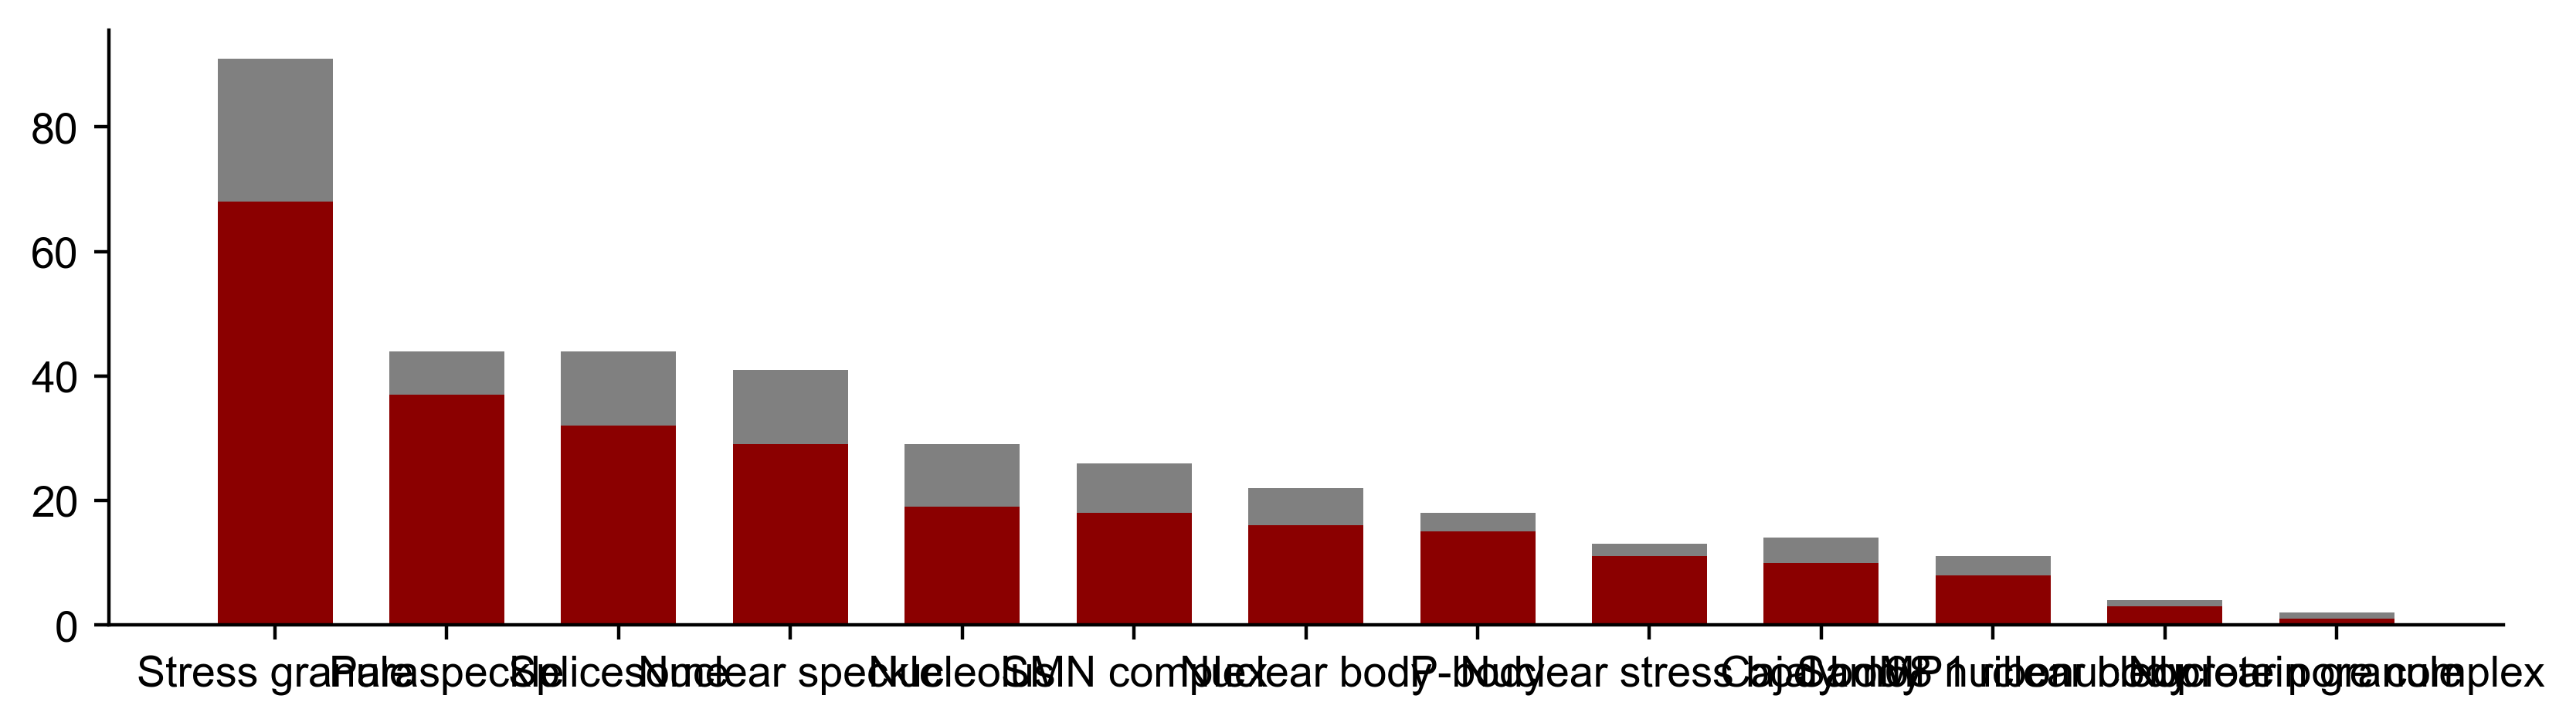

In [ ]:
x = mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['MLO'].tolist()[:-2]
y1 = [1-283/3482,1-493/2093]
y2 = [283/3482-32/3482,493/2093-112/2093]
y3 = [32/3482,112/2093]

plt.figure(figsize=(10, 2.5),dpi = 400)

plt.bar(x, mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Weighted'].tolist()[:-2], width=0.67,color='darkred')
plt.bar(x, mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Unweighted'].tolist()[:-2], bottom=mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['Weighted'].tolist()[:-2], width=0.67,color='grey')

sns.despine()

In [131]:
from scipy import stats

In [160]:
stats.spearmanr(mlo_enrich_count_df['Weighted'].tolist(),mlo_enrich_count_df['Unweighted'].tolist())

SignificanceResult(statistic=0.9399137160364188, pvalue=1.960703563836531e-07)

In [187]:
color_dict = dict(zip(list(weighted_plot_mlo_df.index)+list(unweighted_plot_mlo_df.index),['firebrick']*112+['grey']*32))

In [186]:
pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df])

,Cajal body,IMP1 ribonucleoprotein granule,Nuclear body,Nuclear pore complex,Nuclear speckle,Nuclear stress body,Nucleolus,P-body,Paraspeckle,SMN complex,Sam68 nuclear body,Splicesome,Stress granule
Label,,,,,,,,,,,,,
SSRP1(31),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,3.758164,0.341983,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.628460
ACBD3(82),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,3.910354
SP100(4),-0.000000,-0.0000,1.624070,-0.0,-0.000000,-0.000000,0.005888,0.178053,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
MLLT1(18),1.776342,-0.0000,-0.000000,-0.0,1.225695,-0.000000,0.005888,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.066036
HP1BP3(250),-0.000000,8.2506,7.259976,-0.0,0.319464,0.560857,96.135702,13.698635,1.117469,1.904699,0.342681,2.094168,10.878525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRIP4(8),-0.000000,-0.0000,-0.000000,-0.0,2.039528,-0.000000,0.015613,-0.000000,0.139407,-0.000000,-0.000000,-0.000000,1.419447
RBMX(13),-0.000000,-0.0000,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.402224,-0.000000,2.409944,0.597453,0.223790
TRA2B_1(12),0.039145,-0.0000,0.651102,-0.0,1.548240,-0.000000,0.343743,0.084317,0.432551,-0.000000,0.275174,3.178554,1.487208


In [213]:
m = [1,2,3].reverse()
m

d:\conda\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


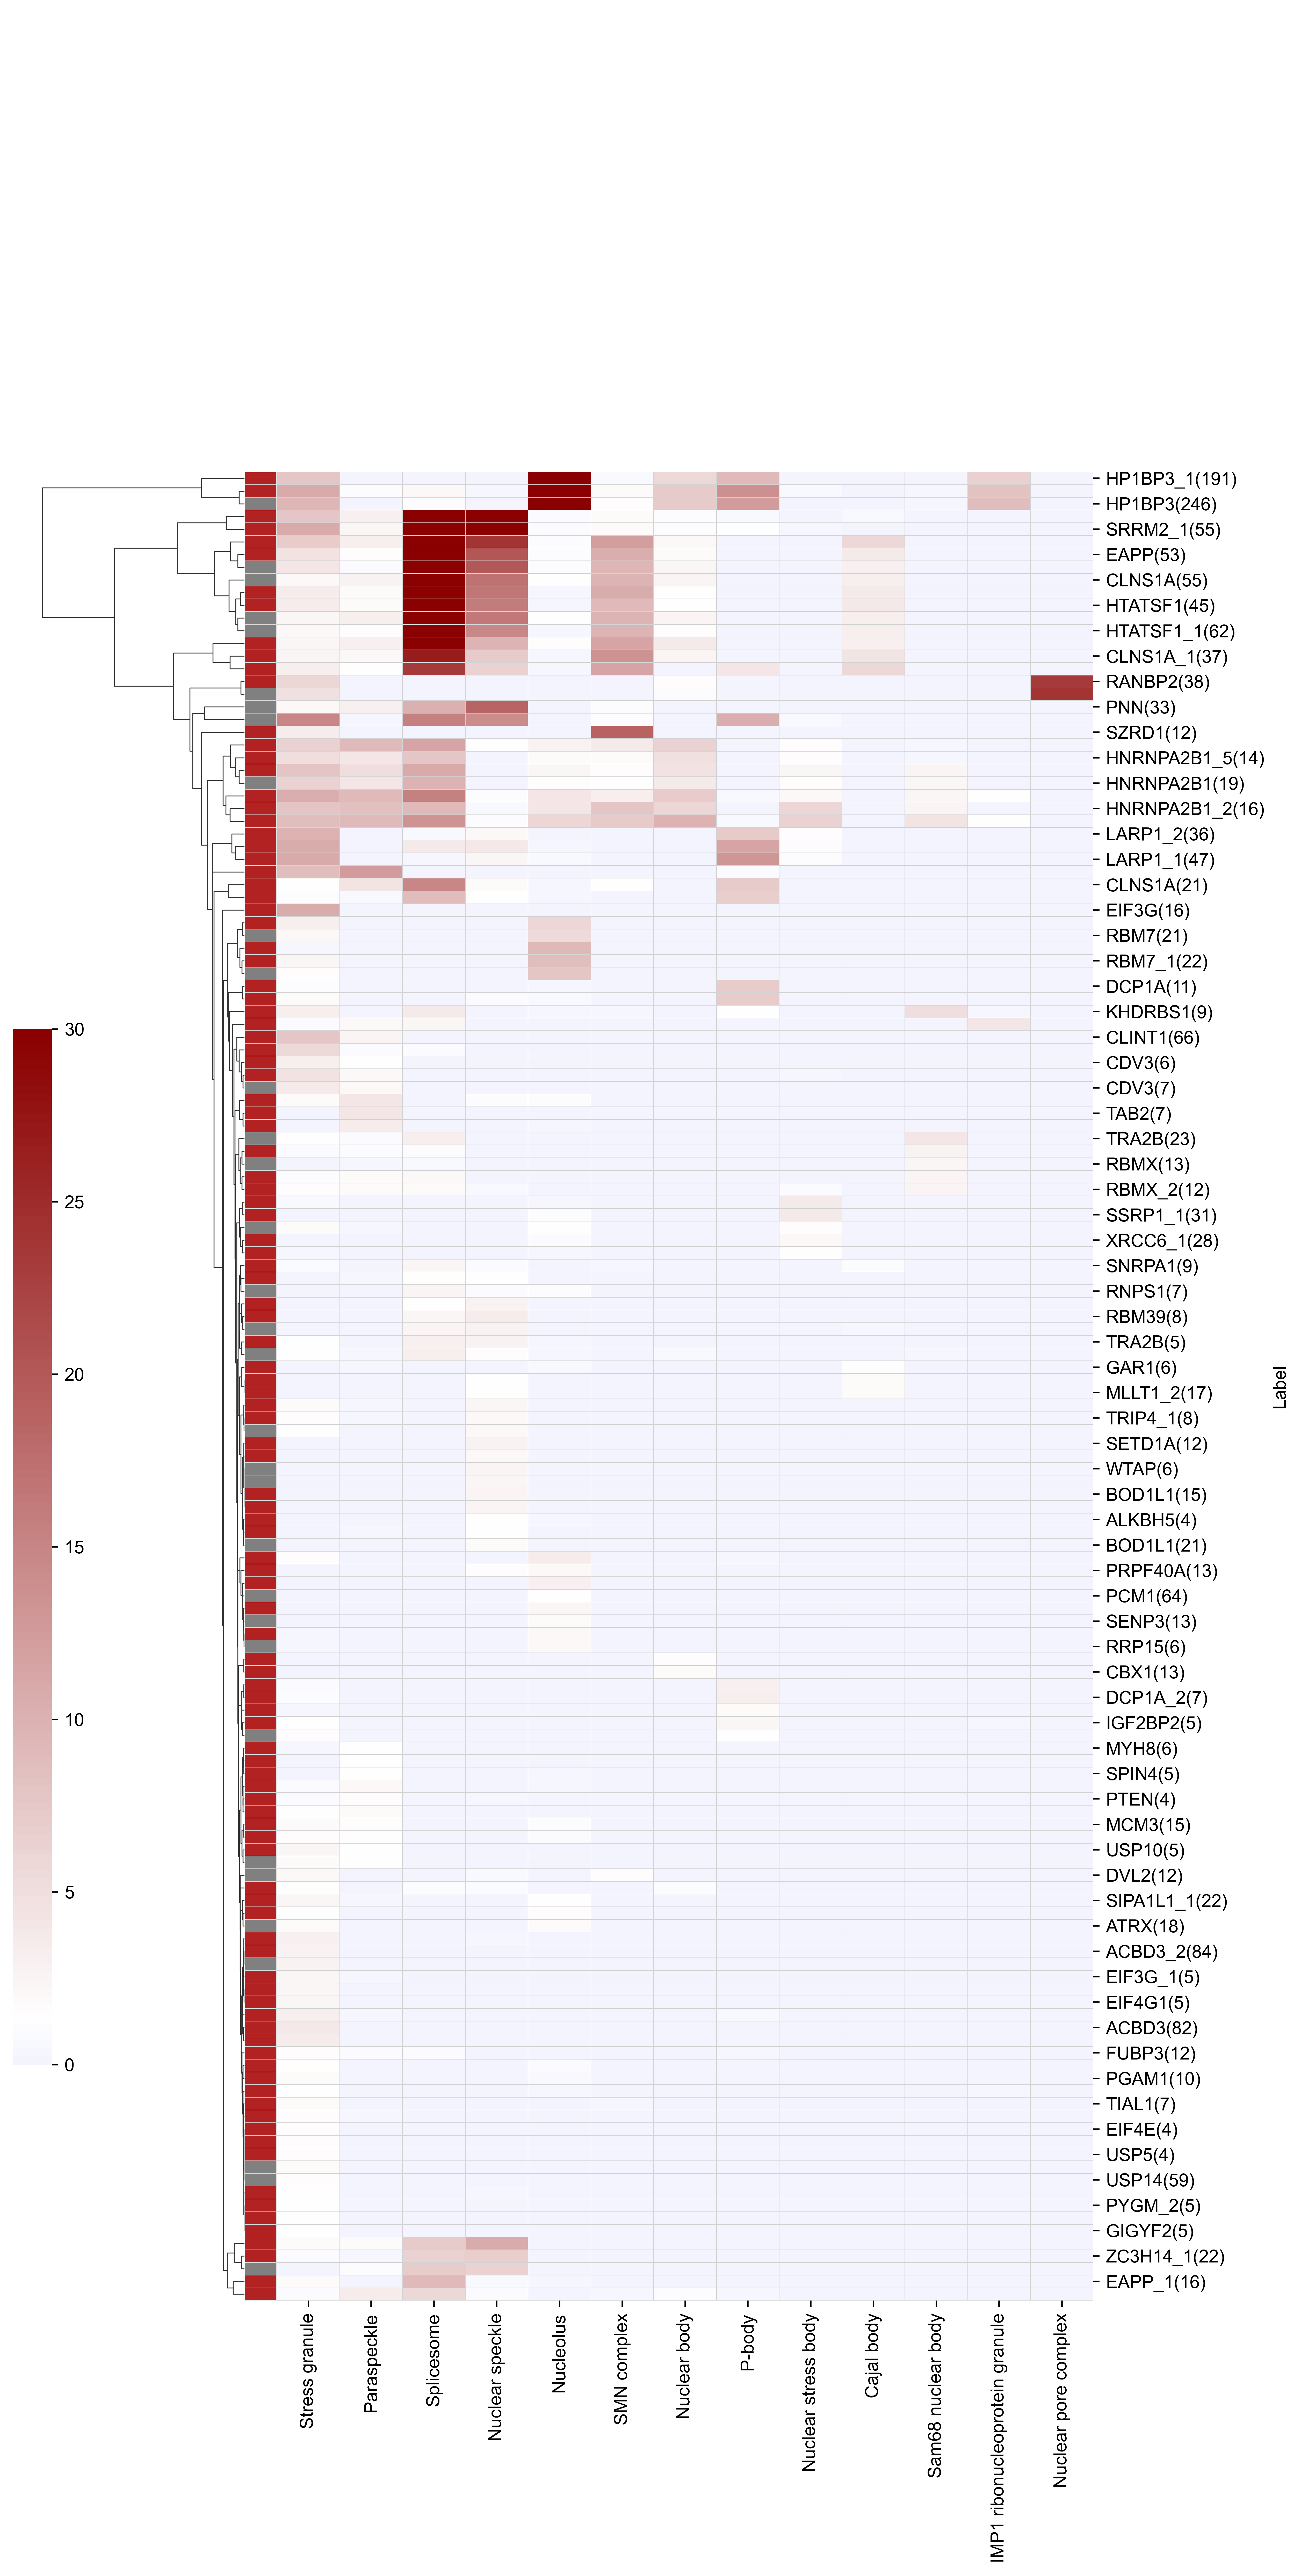

In [ ]:
my_colormap1 = LinearSegmentedColormap.from_list("", ["blue","white","darkred"])

ax = sns.clustermap(pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df]).loc[:,mlo_enrich_count_df.sort_values(by=['Weighted'],ascending=False)['MLO'].tolist()[:-2]], cmap = my_colormap1, annot = False, figsize=(10,20),col_cluster=False,
            vmin=0,vmax = 30, center=-np.log10(0.05),square = True, linewidth=0.01,linecolor='lightgrey',cbar_pos=(0, .2, .03, .4),row_colors=pd.concat([weighted_plot_mlo_df,unweighted_plot_mlo_df]).index.map(color_dict)
           )

## Time-resolved sg clusters analyse

In [ ]:
sg_time_proteins = pd.read_csv("./SG_proteome_time.csv")
sg_time_proteins

sg_time_dict = sg_time_proteins.set_index(['uniprot']).to_dict()['Time']

In [ ]:
g3bp1_dict = pd.read_csv("../data/g3bp1_cossim.csv")
g3bp1_dict['2'] = [i.replace('Q13283','') for i in g3bp1_dict['2']]
g3bp1_dict = g3bp1_dict.set_index(['2']).to_dict()['mean.cos.sim']

In [252]:
g3bp1_dict['Q13283'] = 1

In [239]:
sg_clusters = weighted_enrich_df[weighted_enrich_df['FDR Stress granule']< 0.05].iloc[:,:15]

for t in ['Early','Late','Invariable']:
    sg_clusters[t] = [[sg_time_dict[k] if k in sg_time_dict.keys() else '_' for k in i.split(' ') ].count(t)/len(i.split(' ')) for i in sg_clusters['Members'].tolist()]

In [317]:
sg_clusters_with_time = sg_clusters[(sg_clusters['Early']>=0.3)|(sg_clusters['Late']>=0.3)|(sg_clusters['Invariable']>=0.3)]

In [318]:
len(sg_clusters_with_time)

16

In [2]:
sg_clusters = pd.read_table("sg_temp.txt",sep='	')
sg_clusters

,Cluster,Size,Density,Internal weight,External weight,Quality,P-value,Members,FDR PS proteins,Frac PS proteins,Entry,Gene Name,Label,mean_SaPS,mean_PdPS,Early,Late,Invariable,G3BP1_mean_cossim
0,277,191,0.3000,5444.000,7175.00,0.41870,0.000000,Q53T94 P62829 O43159 P61313 Q68D10 O15479 P608...,9.970000e-51,0.759162,Q5SSJ5,HP1BP3,HP1BP3_1(191),0.469406,0.629711,0.361257,0.015707,0.031414,0.653888
1,308,14,0.3064,27.880,311.90,0.07580,0.999690,Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...,6.260170e-04,0.785714,P22626,HNRNPA2B1,HNRNPA2B1(14),0.759923,0.774339,0.642857,0.000000,0.000000,0.698731
2,374,16,0.3598,43.170,198.70,0.15760,0.953244,O75821 O15372 P60842 O00303 O15371 Q9Y262 Q7L2...,4.911401e-02,0.562500,O75821,EIF3G,EIF3G(16),0.495707,0.549203,0.000000,0.312500,0.187500,0.515445
3,411,6,0.3726,5.589,67.84,0.06543,0.989880,Q8NCA5 Q8WWM7 Q99700 Q3MHD2 P00813 Q9BUT9,1.952822e-01,0.666667,Q8WWM7,ATXN2L,ATXN2L(6),0.642298,0.613377,0.166667,0.000000,0.333333,0.646075
4,488,16,0.3041,36.490,287.60,0.10250,0.999965,Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...,5.140000e-07,0.937500,P22626,HNRNPA2B1,HNRNPA2B1_1(16),0.848726,0.828685,0.625000,0.000000,0.000000,0.703754
5,590,12,0.3044,20.090,231.40,0.07293,0.999846,O95433 Q96D46 P22314 P41252 P08243 P27708 P078...,8.810641e-02,0.583333,Q8WW22,DNAJA4,DNAJA4(12),0.233283,0.483069,0.000000,0.333333,0.000000,0.447438
6,719,12,0.3156,20.830,176.80,0.09400,0.998225,O14893 Q9UHI6 P57678 Q8TEQ6 P83369 Q16637 Q8WX...,8.810641e-02,0.583333,Q7Z422,SZRD1,SZRD1(12),0.416215,0.553427,0.000000,0.000000,0.333333,0.478544
7,721,9,0.3039,10.940,178.30,0.05279,0.999853,Q99700 O43390 O43143 Q5VWX1 Q9Y5E9 Q07666 O755...,2.109341e-01,0.555556,Q07666,KHDRBS1,KHDRBS1(9),0.521900,0.488595,0.333333,0.000000,0.111111,0.649768
8,838,16,0.3177,38.130,307.90,0.10090,0.999987,P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...,1.090000e-08,1.000000,P22626,HNRNPA2B1,HNRNPA2B1_2(16),0.918141,0.882645,0.562500,0.125000,0.000000,0.732395
9,948,7,0.3196,6.712,105.40,0.05323,0.999299,Q8N684 Q8IVL5 O43809 Q92945 Q9HBH9 Q16630 Q8N1G4,8.810641e-02,0.714286,Q16630,CPSF6,CPSF6(7),0.437400,0.568152,0.428571,0.000000,0.000000,0.665019


In [25]:
stats.wilcoxon(sg_clusters['Early'].tolist(),sg_clusters['Late'].tolist())

WilcoxonResult(statistic=14.5, pvalue=0.01702839337903773)

In [7]:
stats.wilcoxon(sg_clusters['Early'].tolist(),sg_clusters['Invariable'].tolist())

WilcoxonResult(statistic=19.0, pvalue=0.03546470751403722)

In [8]:
stats.wilcoxon(sg_clusters['Late'].tolist(),sg_clusters['Invariable'].tolist())

WilcoxonResult(statistic=32.0, pvalue=0.5816090490668071)

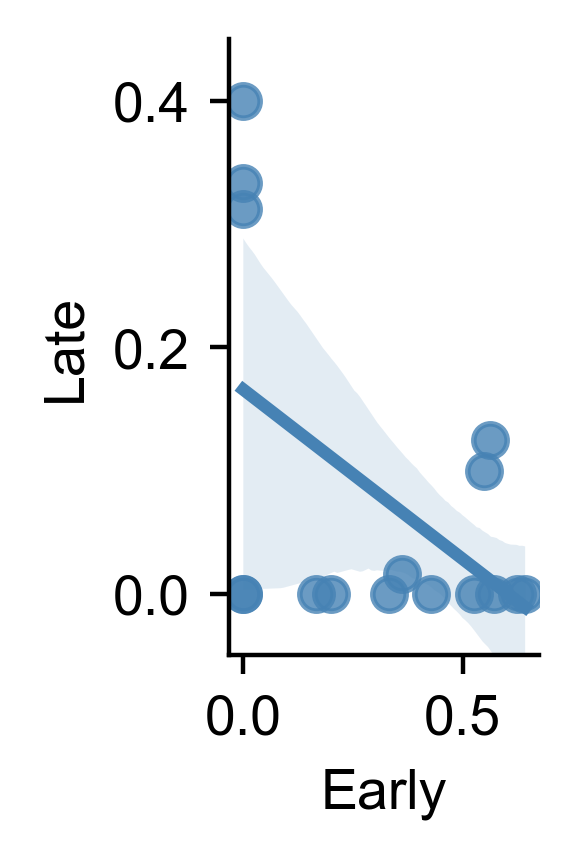

In [ ]:
plt.figure(figsize=(1, 2),dpi = 400)


sns.regplot(data=sg_clusters,x='Early',y='Late',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()


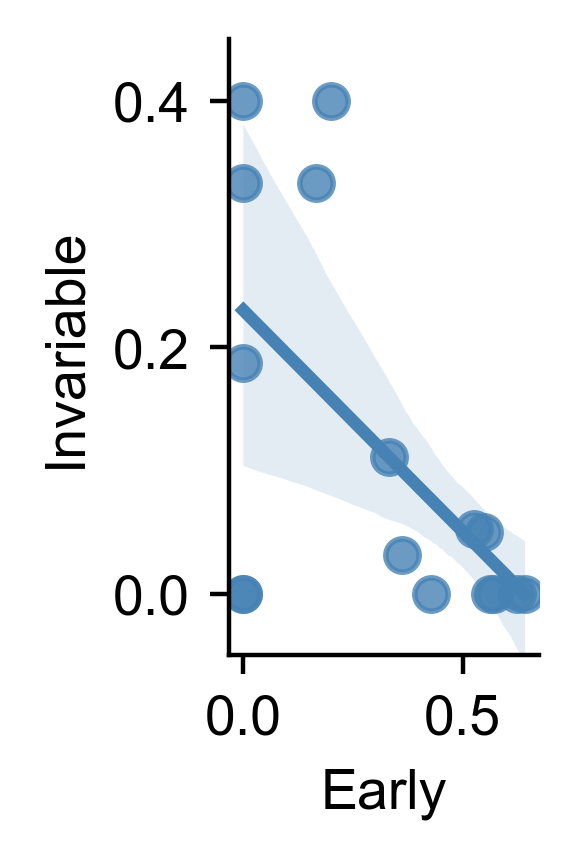

In [ ]:
plt.figure(figsize=(1, 2),dpi = 400)


sns.regplot(data=sg_clusters,x='Early',y='Invariable',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()


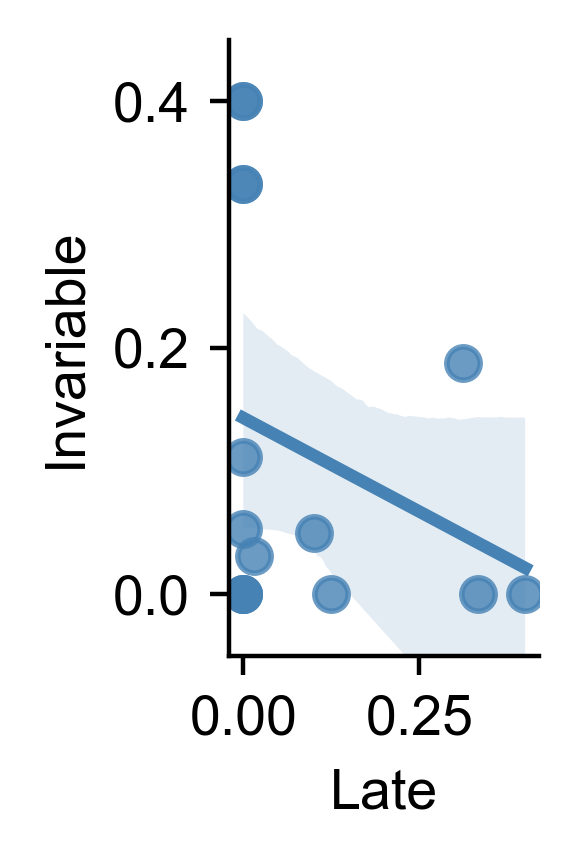

In [ ]:
plt.figure(figsize=(1, 2),dpi = 400)


sns.regplot(data=sg_clusters,x='Late',y='Invariable',color='steelblue')

plt.ylim([-0.05,0.45])
plt.yticks([0,0.2,0.4])

sns.despine()


In [3]:
early_clusters = ['HNRNPA2B1(14)','HNRNPA2B1_1(16)','HNRNPA2B1_5(14)','HNRNPA2B1_2(16)','HNRNPA2B1_4(20)','HNRNPA2B1_3(19)','CPSF6(7)','HP1BP3_1(191)','KHDRBS1(9)']
late_clusters = ['EIF4G1(5)','DNAJA4(12)','EIF3G(16)']
innv_clusters = ['USP10(5)','GIGYF2(5)','ATXN2L(6)','SZRD1(12)']

In [4]:
cluster_order  = early_clusters+innv_clusters+late_clusters

In [5]:
sg_clusters = sg_clusters.set_index(['Label']).loc[cluster_order,:]

In [6]:
sg_clusters

,Cluster,Size,Density,Internal weight,External weight,Quality,P-value,Members,FDR PS proteins,Frac PS proteins,Entry,Gene Name,mean_SaPS,mean_PdPS,Early,Late,Invariable,G3BP1_mean_cossim
Label,,,,,,,,,,,,,,,,,,
HNRNPA2B1(14),308,14,0.3064,27.880,311.90,0.07580,0.999690,Q32P51 P35637 Q86Y13 P31943 P52597 P52272 B1AT...,6.260170e-04,0.785714,P22626,HNRNPA2B1,0.759923,0.774339,0.642857,0.000000,0.000000,0.698731
HNRNPA2B1_1(16),488,16,0.3041,36.490,287.60,0.10250,0.999965,Q15424 Q14151 O14979 P35637 P52272 Q13470 P557...,5.140000e-07,0.937500,P22626,HNRNPA2B1,0.848726,0.828685,0.625000,0.000000,0.000000,0.703754
HNRNPA2B1_5(14),1653,14,0.3022,27.500,234.30,0.09490,0.997642,Q15424 O14979 P35637 P52272 P55795 P22626 P519...,6.260170e-04,0.785714,P22626,HNRNPA2B1,0.762995,0.734653,0.571429,0.000000,0.000000,0.694647
HNRNPA2B1_2(16),838,16,0.3177,38.130,307.90,0.10090,0.999987,P49750 P23246 Q15424 Q14151 O14979 P35637 Q928...,1.090000e-08,1.000000,P22626,HNRNPA2B1,0.918141,0.882645,0.562500,0.125000,0.000000,0.732395
HNRNPA2B1_4(20),1616,20,0.3025,57.480,453.30,0.10440,0.999900,P09651 P23246 Q15424 Q14151 O14979 P35637 Q5T4...,2.290000e-09,0.950000,P22626,HNRNPA2B1,0.859757,0.839673,0.550000,0.100000,0.050000,0.717531
HNRNPA2B1_3(19),1056,19,0.3077,52.620,483.40,0.09167,0.999959,P09651 Q32P51 Q15424 O14979 P35637 O43347 P319...,3.210000e-06,0.842105,P22626,HNRNPA2B1,0.794543,0.817116,0.526316,0.000000,0.052632,0.709925
CPSF6(7),948,7,0.3196,6.712,105.40,0.05323,0.999299,Q8N684 Q8IVL5 O43809 Q92945 Q9HBH9 Q16630 Q8N1G4,8.810641e-02,0.714286,Q16630,CPSF6,0.437400,0.568152,0.428571,0.000000,0.000000,0.665019
HP1BP3_1(191),277,191,0.3000,5444.000,7175.00,0.41870,0.000000,Q53T94 P62829 O43159 P61313 Q68D10 O15479 P608...,9.970000e-51,0.759162,Q5SSJ5,HP1BP3,0.469406,0.629711,0.361257,0.015707,0.031414,0.653888
KHDRBS1(9),721,9,0.3039,10.940,178.30,0.05279,0.999853,Q99700 O43390 O43143 Q5VWX1 Q9Y5E9 Q07666 O755...,2.109341e-01,0.555556,Q07666,KHDRBS1,0.521900,0.488595,0.333333,0.000000,0.111111,0.649768


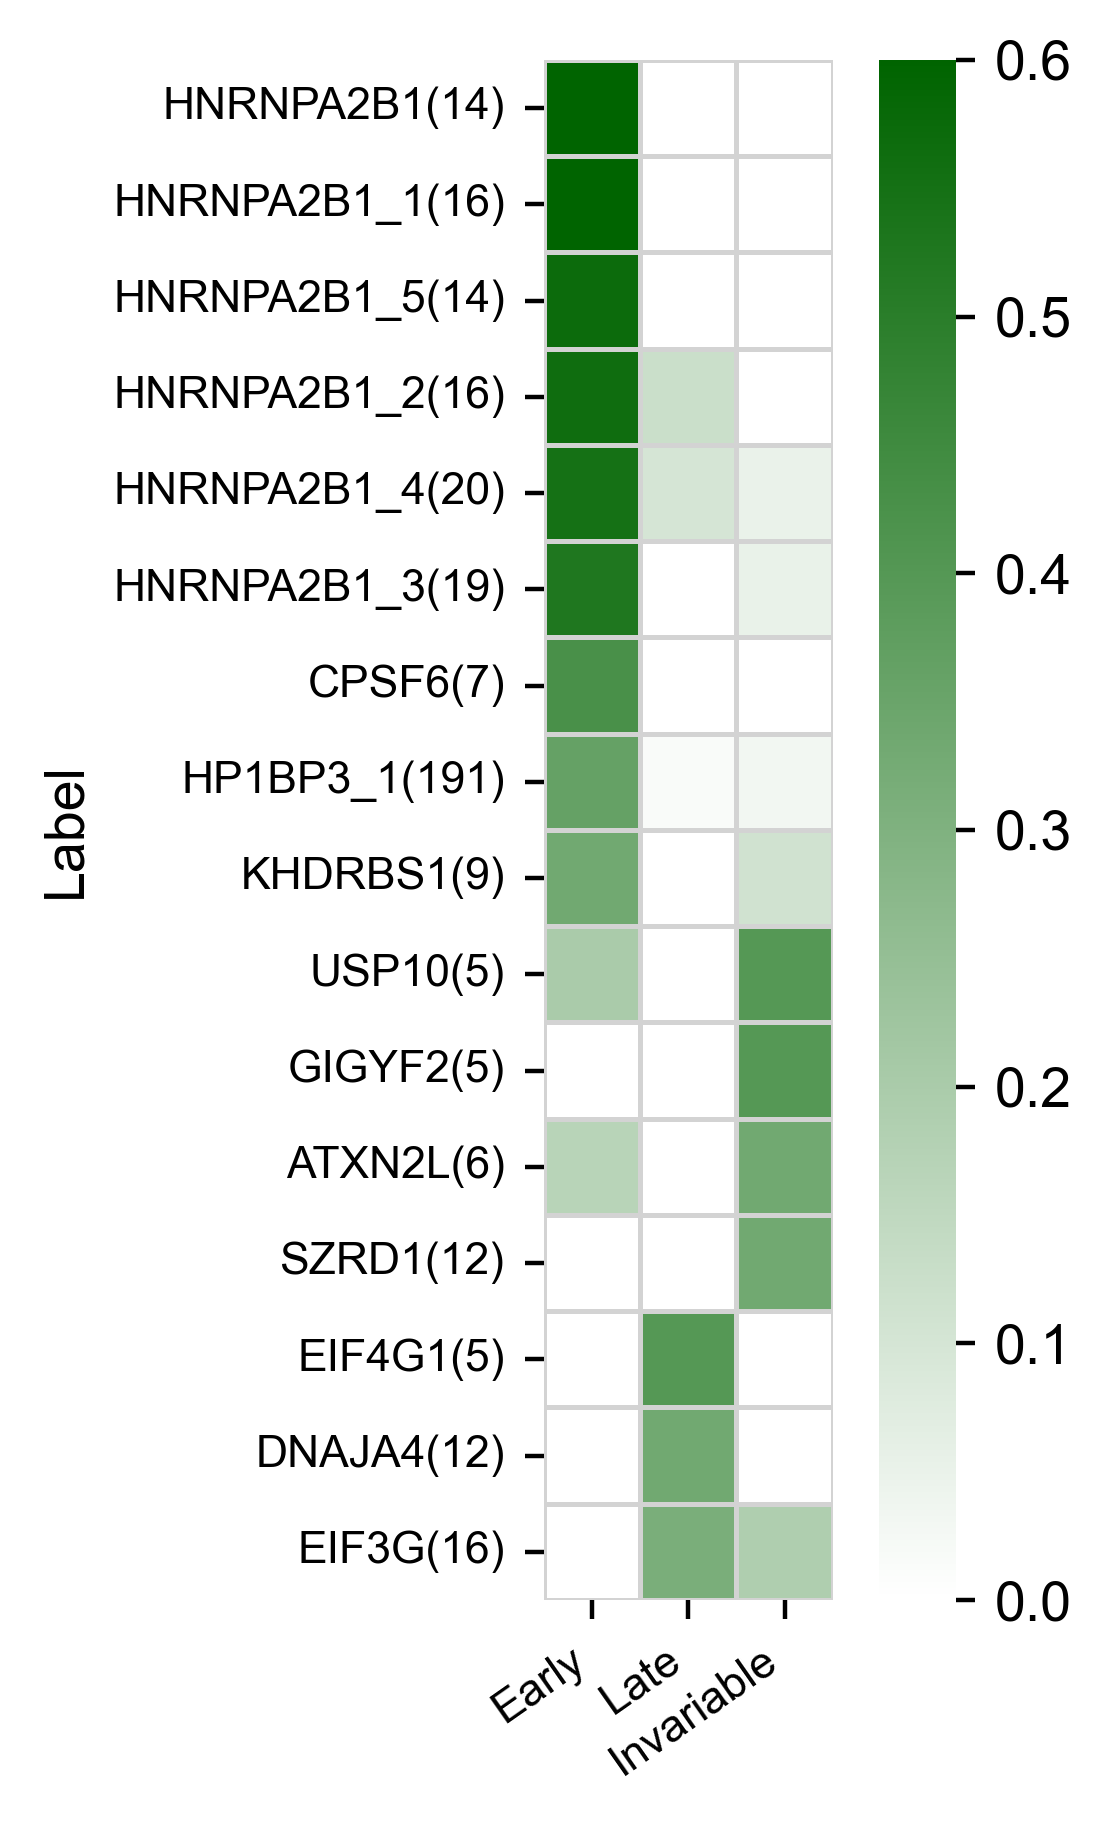

In [ ]:
#Time-resolved fraction
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "darkgreen"])
plt.figure(figsize=(3, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(sg_clusters.loc[:,['Early','Late','Invariable']].fillna(0), cmap = my_colormap1, annot = False, 
            vmin=0,vmax = 0.6, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')


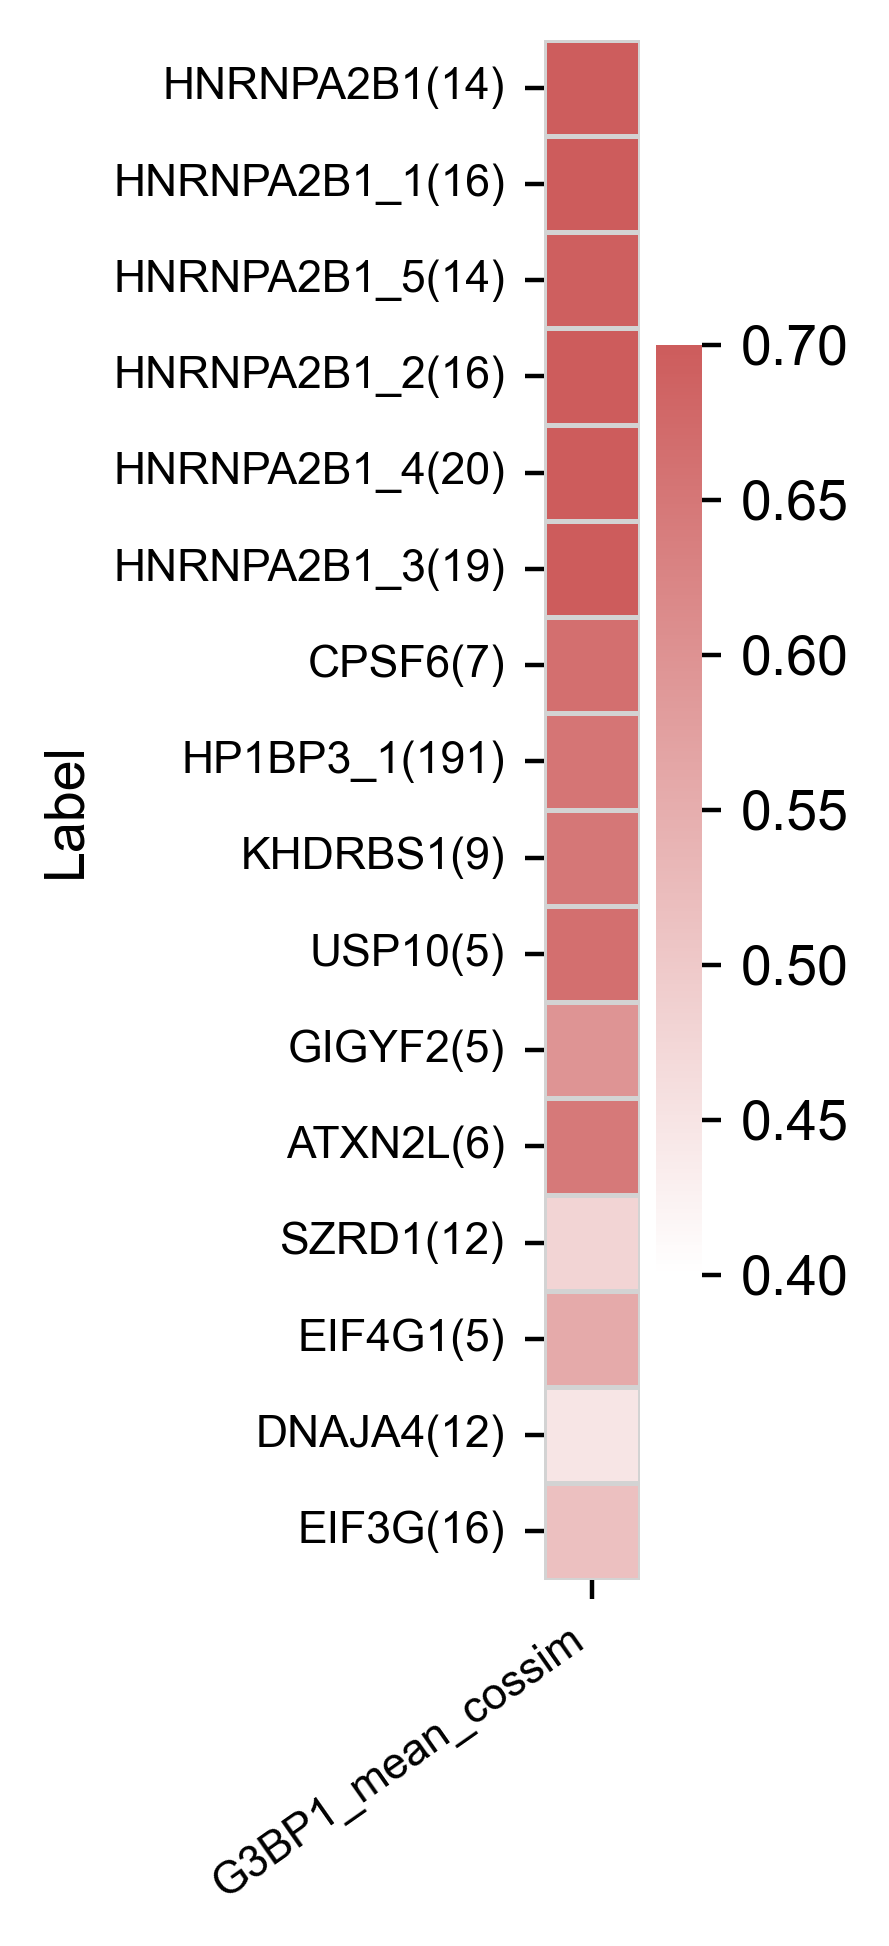

In [ ]:
#G3BP1 cos.sim
my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "indianred"])
plt.figure(figsize=(1, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(sg_clusters.loc[:,['G3BP1_mean_cossim']].fillna(0), cmap = my_colormap1, annot = False, 
            vmin=0.4,vmax = 0.7, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')

In [337]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[:9],sg_clusters['G3BP1_mean_cossim'].tolist()[9:13])

MannwhitneyuResult(statistic=34.0, pvalue=0.011188811188811189)

In [338]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[:9],sg_clusters['G3BP1_mean_cossim'].tolist()[13:16])

MannwhitneyuResult(statistic=27.0, pvalue=0.00909090909090909)

In [339]:
stats.mannwhitneyu(sg_clusters['G3BP1_mean_cossim'].tolist()[9:13],sg_clusters['G3BP1_mean_cossim'].tolist()[13:16])

MannwhitneyuResult(statistic=10.0, pvalue=0.22857142857142856)

In [7]:
sg_clusters['class'] = ['Early']*9+['Invariable']*4+['Late']*3

C:\Users\wqswx\AppData\Local\Temp\ipykernel_15872\3665667448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sg_clusters,x='class',y='G3BP1_mean_cossim',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)


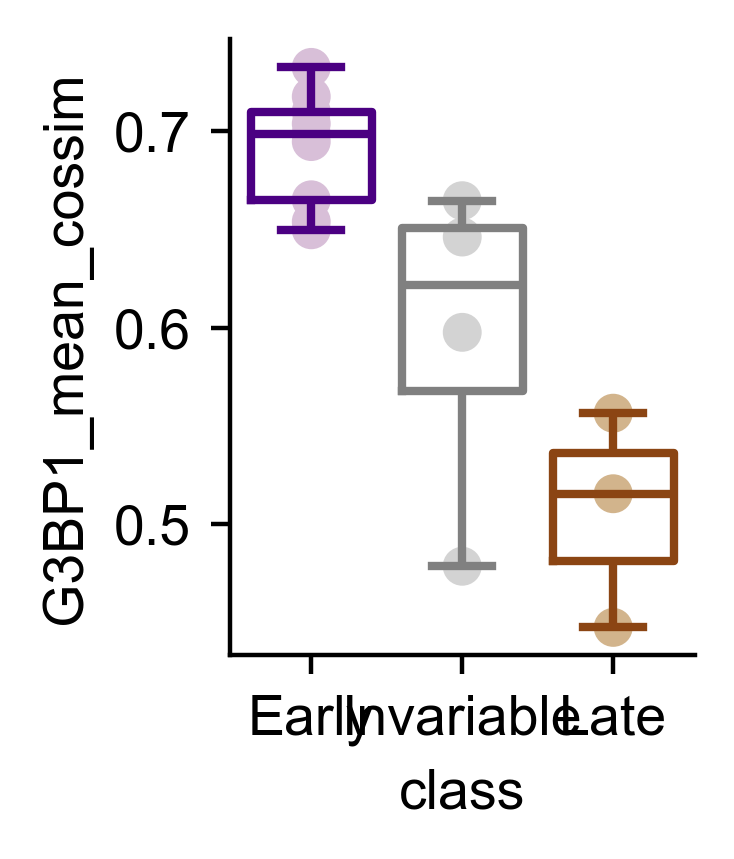

In [ ]:
plt.figure(figsize=(1.5, 2),dpi = 400)

sns.boxplot(data=sg_clusters,x='class',y='G3BP1_mean_cossim',showfliers=False,palette = {'Early':'indigo','Late':'saddlebrown','Invariable':'grey'}, fill=False)
plt.scatter(data=sg_clusters,x='class',y='G3BP1_mean_cossim',color = ['thistle']*9+['lightgrey']*4+['tan']*3)

sns.despine()

In [26]:
import gseapy as gp

In [34]:
gene_background = list(set([uniprot_to_genename_dict[i] for i in genes if i in uniprot_to_genename_dict.keys()]))
len(gene_background)

15901

In [36]:
all_enrich = pd.DataFrame()

In [ ]:
for c in sg_clusters['Members'].tolist():
    protein_list = list(set([uniprot_to_genename_dict[p] for p in c.split(' ') if p in uniprot_to_genename_dict.keys()]))

    enrich_go = gp.enrichr(gene_list=protein_list,
                     gene_sets=['GO_Biological_Process_2023'],
                      organism='human', # organism argment is ignored because user input a background
                     background=gene_background,
                     outdir=None, # don't write to disk
                    ).results
    
    enrich_go['cluster'] = [c]*len(enrich_go)

    all_enrich = pd.concat([all_enrich,enrich_go])

In [41]:
all_enrich['cluster'] = all_enrich['cluster'].map(sg_clusters.set_index(['Members']).to_dict()['Label'])

In [42]:
all_enrich.head(2)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,cluster
0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),7.912269e-113,5.174624e-110,0,0,338.998387,87503.518298,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191)
1,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),2.886072e-93,9.437455e-91,0,0,102.842431,21913.718461,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191)


In [44]:
all_enrich.iloc[0,-1][:-1].split('(')[1]

'191'

In [45]:
all_enrich['Fraction'] = [len(all_enrich.iloc[i,-2].split(';'))/int(all_enrich.iloc[i,-1][:-1].split('(')[1]) for i in range(len(all_enrich))]

In [ ]:
all_enrich = pd.read_csv("./SG_related_enrich.csv")
all_enrich

,Unnamed: 0,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,cluster,Fraction
0,0,GO_Biological_Process_2023,Cytoplasmic Translation (GO:0002181),7.912269e-113,5.174624e-110,0,0,338.998387,87503.518298,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.350785
1,1,GO_Biological_Process_2023,Peptide Biosynthetic Process (GO:0043043),2.886072e-93,9.437455e-91,0,0,102.842431,21913.718461,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.356021
2,2,GO_Biological_Process_2023,Macromolecule Biosynthetic Process (GO:0009059),3.758216e-87,8.192911e-85,0,0,77.692229,15460.828019,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;RPLP1;R...,HP1BP3_1(191),0.356021
3,3,GO_Biological_Process_2023,Gene Expression (GO:0010467),5.880858e-81,9.615202e-79,0,0,46.458703,8582.673461,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPLP1;RPL34;R...,HP1BP3_1(191),0.387435
4,4,GO_Biological_Process_2023,Translation (GO:0006412),9.387508e-80,1.227886e-77,0,0,53.944634,9816.166357,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPLP1;RPL34;R...,HP1BP3_1(191),0.361257
...,...,...,...,...,...,...,...,...,...,...,...,...
1720,68,GO_Biological_Process_2023,Regulation Of Nucleic Acid-Templated Transcrip...,2.963057e-01,3.134829e-01,0,0,3.032687,3.688850,FUS,HNRNPA2B1_5(14),0.071429
1721,69,GO_Biological_Process_2023,Negative Regulation Of Cellular Process (GO:00...,3.436957e-01,3.584255e-01,0,0,2.523241,2.694818,APOBEC3B,HNRNPA2B1_5(14),0.071429
1722,70,GO_Biological_Process_2023,Positive Regulation Of Nucleic Acid-Templated ...,3.607623e-01,3.709246e-01,0,0,2.372129,2.418471,TAF15,HNRNPA2B1_5(14),0.071429
1723,71,GO_Biological_Process_2023,Regulation Of Transcription By RNA Polymerase ...,4.646206e-01,4.710737e-01,0,0,1.352457,1.036705,FUS;SAFB,HNRNPA2B1_5(14),0.142857


In [36]:
go_plot = ['Regulation Of mRNA Polyadenylation',
           'tRNA Aminoacylation',
           'Cytoplasmic Translational Initiation',
           'Peptide Biosynthetic Process',
           'Negative Regulation Of Translation',
           'mRNA Processing',
           'Regulation Of RNA Metabolic Process',
           'RNA Metabolic Process',
           'Regulation Of mRNA Splicing, Via Spliceosome',
           'Regulation Of Stress Granule Assembly']

In [37]:
all_enrich['Term'] = [i.split('(')[0].strip(' ') for i in all_enrich['Term'].tolist()]
all_enrich['-log10(adjust.p)'] = -np.log10(all_enrich['Adjusted P-value'])

In [38]:
go_plot_df = pd.DataFrame(index=cluster_order,columns=go_plot)
for a in cluster_order:
    for b in go_plot:
        try:
            m = all_enrich[all_enrich['Term']==b]
            n = m[m['cluster']==a]
            go_plot_df.loc[a,b] = n['-log10(adjust.p)'].tolist()[0]
        except:
            go_plot_df.loc[a,b] = 0

In [33]:
all_enrich['Term'][0]

'Cytoplasmic Translation'

In [34]:
go_plot_df

,Regulation Of mRNA Polyadenylation,tRNA Aminoacylation,Cytoplasmic Translational Initiation,Peptide Biosynthetic Process,Negative Regulation Of Translation,mRNA Processing,Regulation Of RNA Metabolic Process,"Regulation Of mRNA Splicing, Via Spliceosome",Regulation Of Stress Granule Assembly
HNRNPA2B1(14),0,0,0,0,0,7.943284,6.928082,0.97896,0
HNRNPA2B1_1(16),0,0,0,0,0,4.316252,4.316252,1.694999,0
HNRNPA2B1_5(14),0,0,0,0,0,4.513316,4.513316,0.981242,0
HNRNPA2B1_2(16),0,0,0,0,0,4.293508,3.062878,3.062878,0
HNRNPA2B1_4(20),0,0,0,0,0,6.931587,7.110172,5.766768,0
HNRNPA2B1_3(19),0,0,0,0,0.822218,10.435937,11.264709,2.854649,0
CPSF6(7),6.729503,0,0,0,0,3.405532,0,0,0
HP1BP3_1(191),0,0,0.607517,90.025145,1.171333,0.615969,0.131863,0.799784,0
KHDRBS1(9),0,0,0,0,0,1.453559,0,3.421558,0
USP10(5),0,0,0,0,0,0,0,0,8.136032


C:\Users\wqswx\AppData\Local\Temp\ipykernel_95752\1933123335.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ax = sns.heatmap(go_plot_df.fillna(0), cmap = my_colormap1,


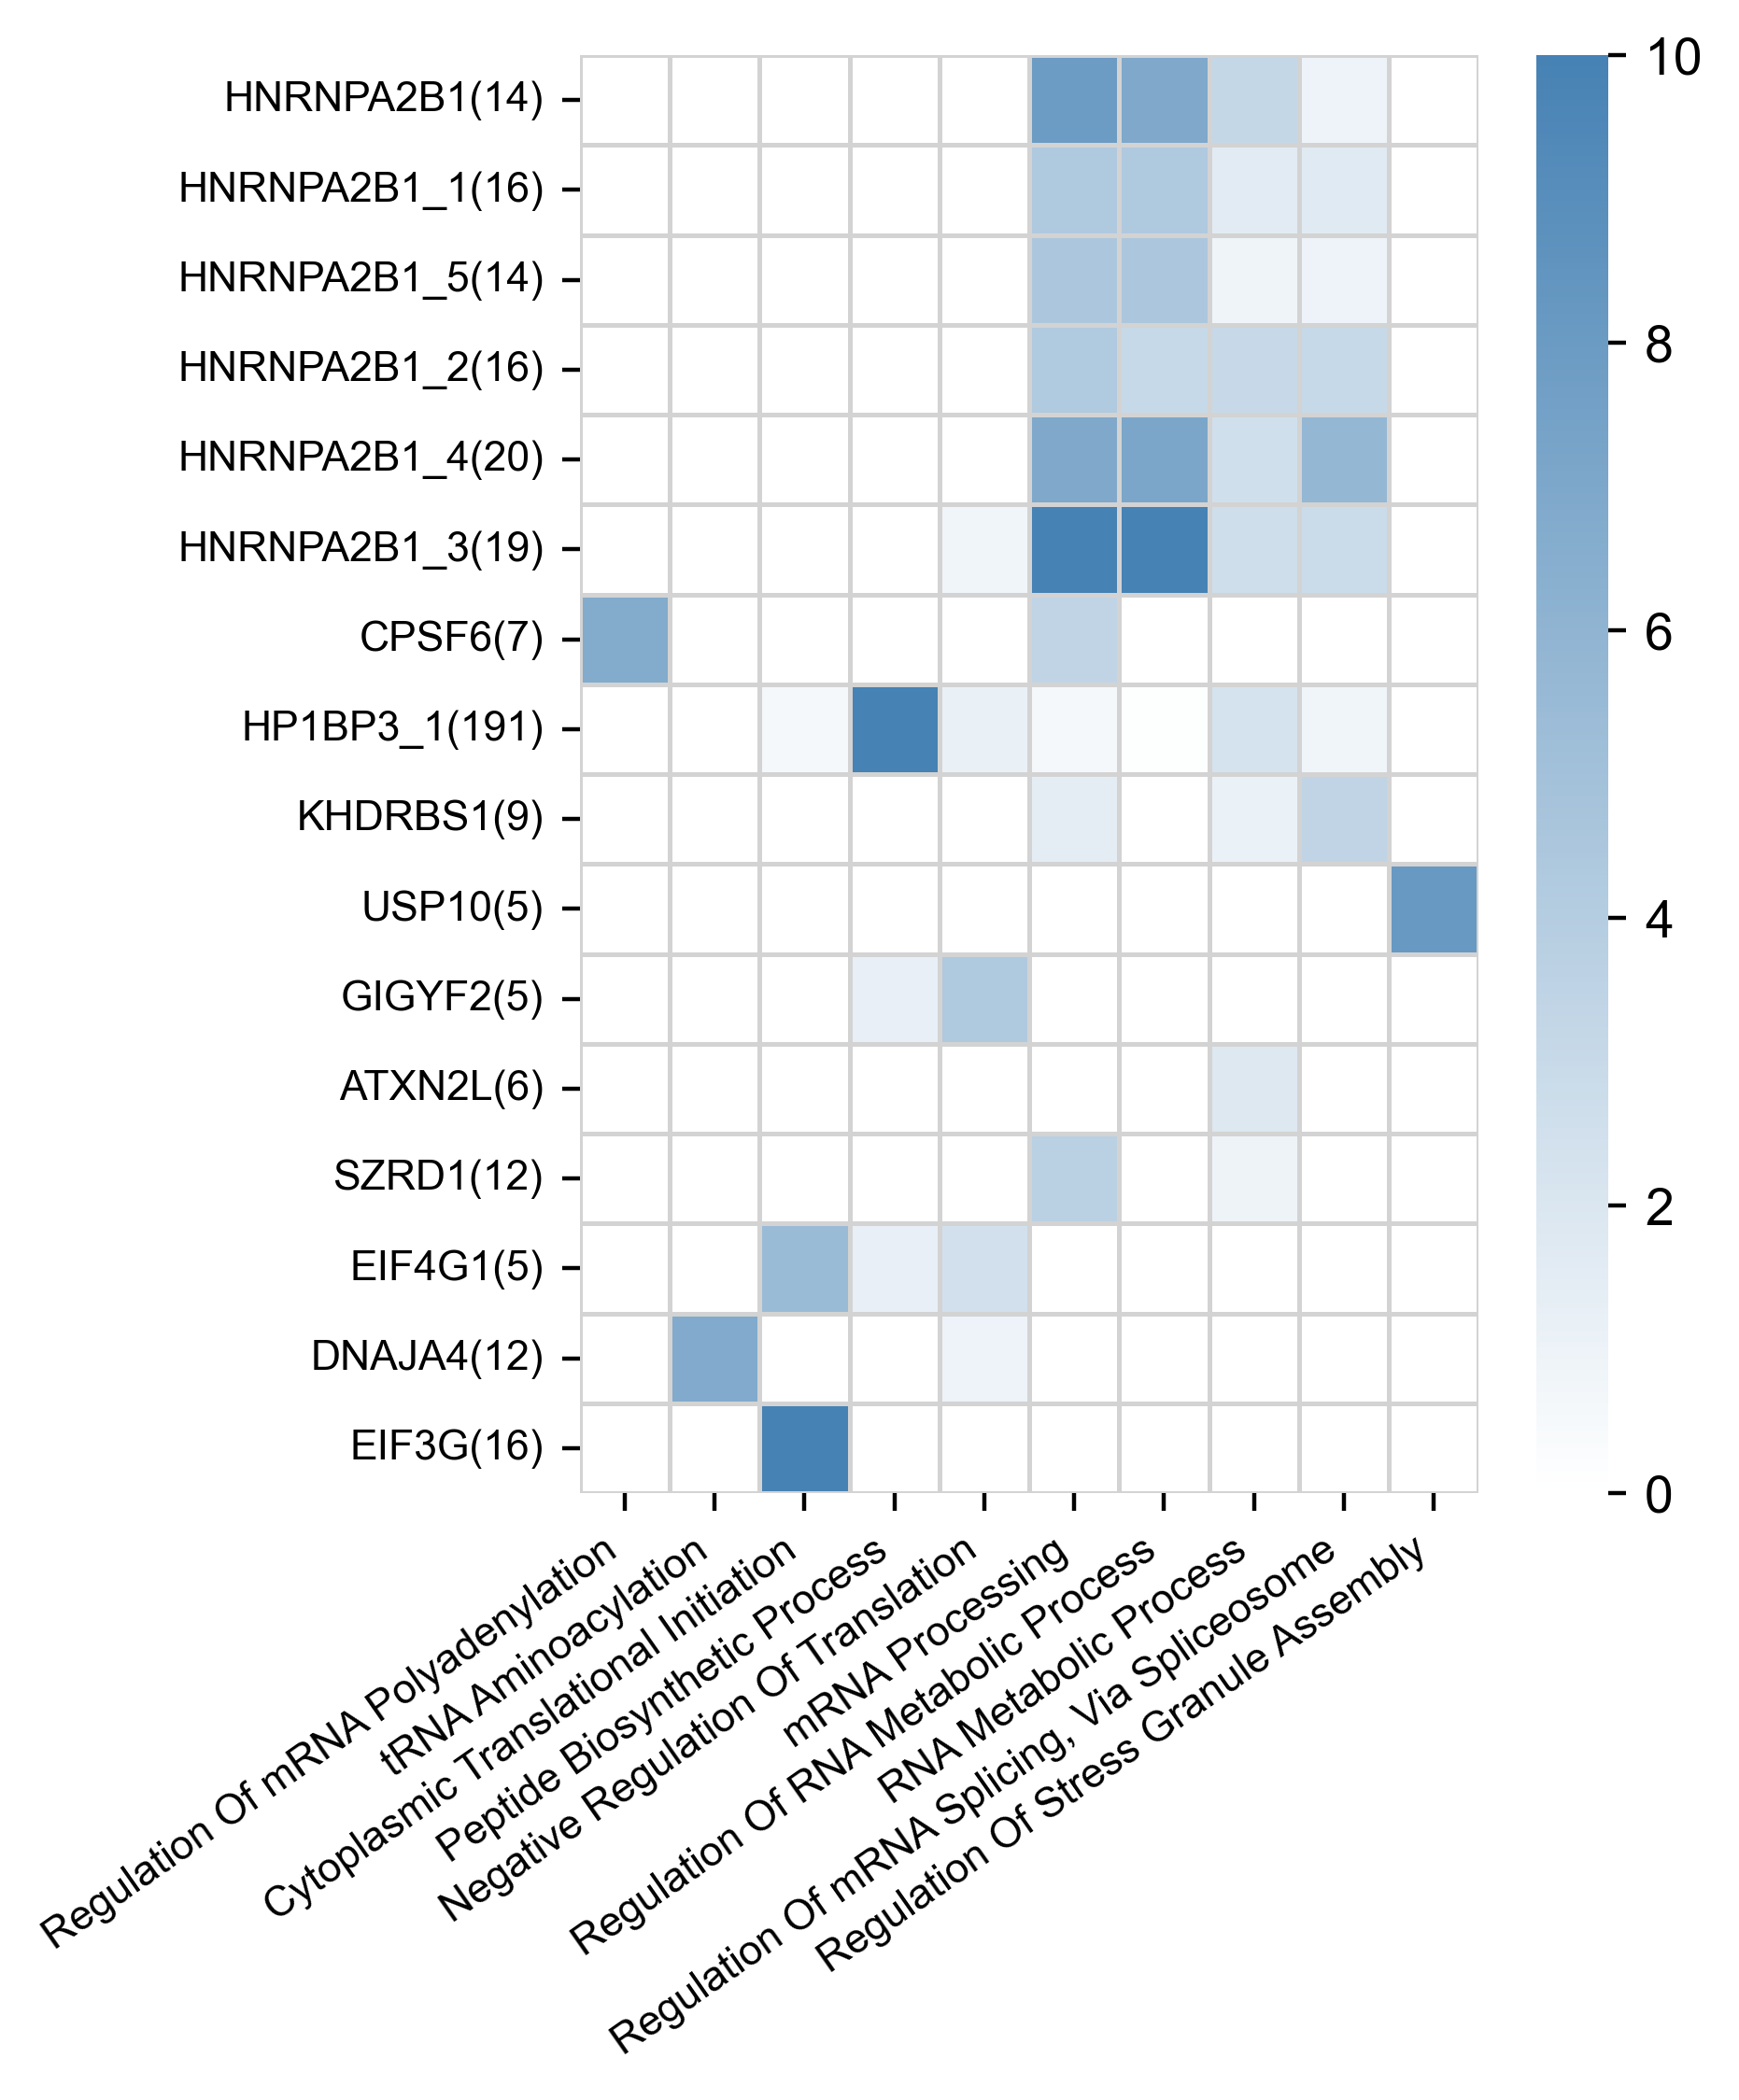

In [ ]:

my_colormap1 = LinearSegmentedColormap.from_list("", ["white", "steelblue"])
plt.figure(figsize=(4, 5),dpi = 400)
plt.subplot(1, 1, 1)


ax = sns.heatmap(go_plot_df.fillna(0), cmap = my_colormap1, 
            vmin=0,vmax = 10, square = True, linewidth=0.6,linecolor='lightgrey'
           )

#ax.tick_params(axis = 'x', pad=5)
#ax.tick_params(axis = 'y', pad=25)
#ax.tick_params(right=True, left=False, top=True, labelright=False, labelbottom=True, labeltop=False,rotation=0)
plt.xticks(rotation=35,ha='right',fontsize=6)
plt.yticks(fontsize=6)
plt.xticks(fontsize=8,fontfamily='Arial')
plt.yticks(fontsize=8,fontfamily='Arial')
